In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [30]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

#Actividad 2 T variable
DataT185 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 185")
DataT195 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 195")
DataT215 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 215")
DataT225 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 225")
DataT240 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 240")

#Actividad 2 U2 variable
DataU2_13 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_3")
DataU2_15 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_5")
DataU2_18 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_8")
DataU2_2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 2")

#Actividad 2 Uh variable
DataUh_58 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 5_8")
DataUh_63 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 6_3")

In [23]:
#Funciones que se usan frecuentemente

#Función para encontrar minimos de las gráficas
def MinFH(datoU1,datoIA):
    # Convertir los datos a arrays numpy
    voltaje = datoU1.values
    corriente = datoIA.values

    # Suavizar la curva usando un filtro gaussiano
    smoothed_corriente = gaussian_filter1d(corriente, sigma=5)

    # Encontrar el mínimo de la curva suavizada
    min_envolvente_index = np.argmin(smoothed_corriente)

    # Encontrar los mínimos locales en la curva suavizada
    minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos

    # Crear un DataFrame con los resultados de los mínimos locales
    minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
    minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]

    minima_suavizada_df = pd.DataFrame({
    'Voltaje U1': minima_suavizada_voltajes,
    'Corriente IA Suavizada': minima_suavizada_corrientes
    })

    return minima_suavizada_df,voltaje,smoothed_corriente

#El r^2 de excel
def GetR2(x,y):
    matrix = np.corrcoef(x,y)
    R2 = (matrix[0,1])**2
    return R2

#Residuales 
#y es el de los datos
#ym es la de la regresion
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

**T variable U2, UH constantes** 

In [4]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_df185,voltaje185, corriente185 = MinFH(DataT185['U1'],DataT185['IA'])
minimos_df195,voltaje195, corriente195 = MinFH(DataT195['U1'],DataT195['IA'])
minimos_df215,voltaje215, corriente215 = MinFH(DataT215['U1'],DataT215['IA'])
minimos_df225,voltaje225, corriente225 = MinFH(DataT225['U1'],DataT225['IA'])
minimos_df240,voltaje240, corriente240 = MinFH(DataT240['U1'],DataT240['IA'])

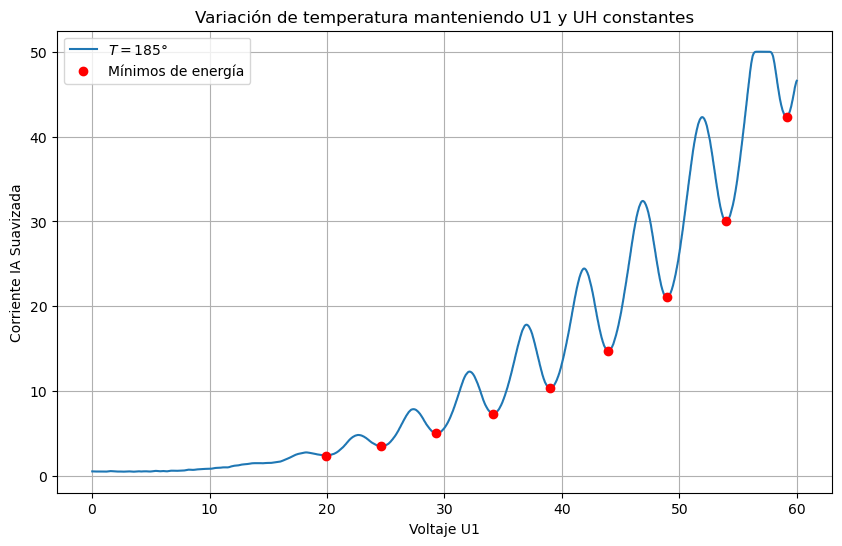

In [5]:
# Plotear la curva suavizada, y los mínimos locales
plt.figure(figsize=(10, 6))
plt.plot(voltaje225, corriente225, label=r"$T=185°$")

plt.plot(minimos_df225['Voltaje U1'][16:], minimos_df225['Corriente IA Suavizada'][16:], 'ro', label='Mínimos de energía')

plt.title('Variación de temperatura manteniendo U1 y UH constantes')
plt.xlabel('Voltaje U1')
plt.ylabel('Corriente IA Suavizada')
plt.legend()
plt.grid()
plt.show()

In [14]:
def difMinimos(min):
    diferences = []
    for i in range(0,len(min)-1):
        dif = min[i+1]-min[i]
        diferences.append(dif)
    return diferences

min1 = difMinimos(minimos_df185['Voltaje U1'])[18:]
min2 = difMinimos(minimos_df195['Voltaje U1'])[19:]
min3 = difMinimos(minimos_df215['Voltaje U1'])[21:]
min4 = difMinimos(minimos_df225['Voltaje U1'])[16:]
min5 = difMinimos(minimos_df240['Voltaje U1'])[32:]

#Regresión lineal
param1 = np.polyfit(np.linspace(4,11,8),min1, 1)
_x1 = np.linspace(0,11,100)
ym1 = param1[0]*_x1 + param1[1]
m1 = param1[0]

param2 = np.polyfit(np.linspace(5,11,7),min2, 1)
_x2 = np.linspace(0,11,100)
ym2 = param2[0]*_x2 + param2[1]
m2 = param2[0]

param3 = np.polyfit(np.linspace(4,11,8),min3, 1)
_x3 = np.linspace(0,11,100)
ym3 = param3[0]*_x3 + param3[1]
m3 = param3[0]

param4 = np.polyfit(np.linspace(4,11,8),min4, 1)
_x4 = np.linspace(0,11,100)
ym4 = param4[0]*_x4 + param4[1]
m4 = param4[0]

param5 = np.polyfit(np.linspace(5,11,6),min5, 1)
_x5 = np.linspace(0,11,100)
ym5 = param5[0]*_x5 + param5[1]
m5 = param5[0]

print('Ea para T=185 será: {}'.format(ym1[9]))
print('Ea para T=195 será: {}'.format(ym2[9]))
print('Ea para T=215 será: {}'.format(ym3[9]))
print('Ea para T=225 será: {}'.format(ym4[9]))
print('Ea para T=240 será: {}'.format(ym5[9]))

print('l_exp para T=185 será: {}'.format((12/(2*ym1[9]))*m1))
print('l_exp para T=195 será: {}'.format((12/(2*ym2[9]))*m2))
print('l_exp para T=215 será: {}'.format((12/(2*ym3[9]))*m3))
print('l_exp para T=225 será: {}'.format((12/(2*ym4[9]))*m4))
print('l_exp para T=240 será: {}'.format((12/(2*ym5[9]))*m5))

#Parte de estadistica
res1 = Residuals(min1,ym1)
res2 = Residuals(min2,ym2)
res3 = Residuals(min3,ym3)
res4 = Residuals(min4,ym4)
res5 = Residuals(min5,ym5)

# #Obetner R^2
# R21 = GetR2(min1,ym1)
# R22 = GetR2(min2,ym2)
# R23 = GetR2(min3,ym3)
# R24 = GetR2(min4,ym4)
# R25 = GetR2(min5,ym5)

#Desviacion estandar
std1 = np.std(min1)
std2 = np.std(min2)
std3 = np.std(min3)
std4 = np.std(min4)
std5 = np.std(min5)


Ea para T=185 será: 4.69952380952381
Ea para T=195 será: 4.572500000000003
Ea para T=215 será: 4.476190476190478
Ea para T=225 será: 4.472857142857144
Ea para T=240 será: 4.533333333333335
l_exp para T=185 será: 0.047725200121593016
l_exp para T=195 será: 0.07076466453174976
l_exp para T=215 será: 0.06574468085106352
l_exp para T=225 será: 0.08815075055892657
l_exp para T=240 será: 0.04569327731092394


0.3175534917938924

El valor del primer mimimo de energía para T= 185 es: 4.91
El valor del primer mimimo de energía para T= 195 es: 4.84
El valor del primer mimimo de energía para T= 215 es: 4.559999999999999
El valor del primer mimimo de energía para T= 225 es: 4.639999999999997
El valor del primer mimimo de energía para T= 240 es: 4.640000000000004


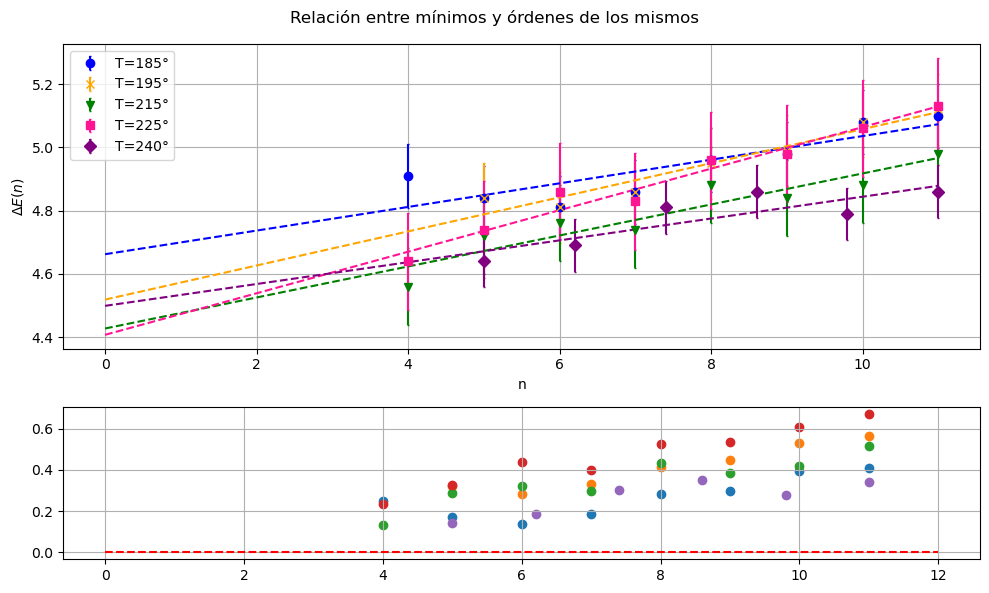

In [33]:
fig, axis = plt.subplots(2,1, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Relación entre mínimos y órdenes de los mismos')

ax1.errorbar(np.linspace(4,11,8),min1,label='T=185°',fmt='o',capsize=0.5,yerr=std1,color='blue')
ax1.errorbar(np.linspace(5,11,7),min2,label='T=195°',fmt='x',capsize=0.5,yerr=std2,color='orange')
ax1.errorbar(np.linspace(4,11,8),min3,label='T=215°',fmt='v',capsize=0.5,yerr=std3,color='green')
ax1.errorbar(np.linspace(4,11,8),min4,label='T=225°',fmt='s',capsize=0.5,yerr=std4,color='deeppink')
ax1.errorbar(np.linspace(5,11,6),min5,label='T=240°',fmt='D',capsize=0.5,yerr=std5,color='purple')

ax1.plot(_x1,ym1,'--',color='blue')
ax1.plot(_x2,ym2,'--',color='orange')
ax1.plot(_x3,ym3,'--',color='green')
ax1.plot(_x4,ym4,'--',color='deeppink')
ax1.plot(_x5,ym5,'--',color='purple')

ax1.set_xlabel('n')
ax1.set_ylabel(r'$\Delta E(n)$')
# ax1.text(0.0020, 12.5, 'y={}x + {}'.format(round(parama1[0],2),round(parama1[1],2)),color='g')
# ax1.text(0.0020, 13, 'R^2 = {}'.format(round(R2a1,2)),color='g')
ax1.grid()
ax1.legend()


ax2.scatter(np.linspace(4,11,8),res1)
ax2.scatter(np.linspace(5,11,7),res2)
ax2.scatter(np.linspace(4,11,8),res3)
ax2.scatter(np.linspace(4,11,8),res4)
ax2.scatter(np.linspace(5,11,6),res5)
ax2.plot(np.linspace(0,12,20),np.zeros_like(np.linspace(0,12,20)),'--',color='r')
ax2.grid()


fig.tight_layout()

print('El valor del primer mimimo de energía para T= 185 es: {}'.format(difMinimos(minimos_df185['Voltaje U1'])[18]))
print('El valor del primer mimimo de energía para T= 195 es: {}'.format(difMinimos(minimos_df195['Voltaje U1'])[19]))
print('El valor del primer mimimo de energía para T= 215 es: {}'.format(difMinimos(minimos_df215['Voltaje U1'])[21]))
print('El valor del primer mimimo de energía para T= 225 es: {}'.format(difMinimos(minimos_df225['Voltaje U1'])[16]))
print('El valor del primer mimimo de energía para T= 240 es: {}'.format(difMinimos(minimos_df240['Voltaje U1'])[32]))

**T, UH constante U2 variable**

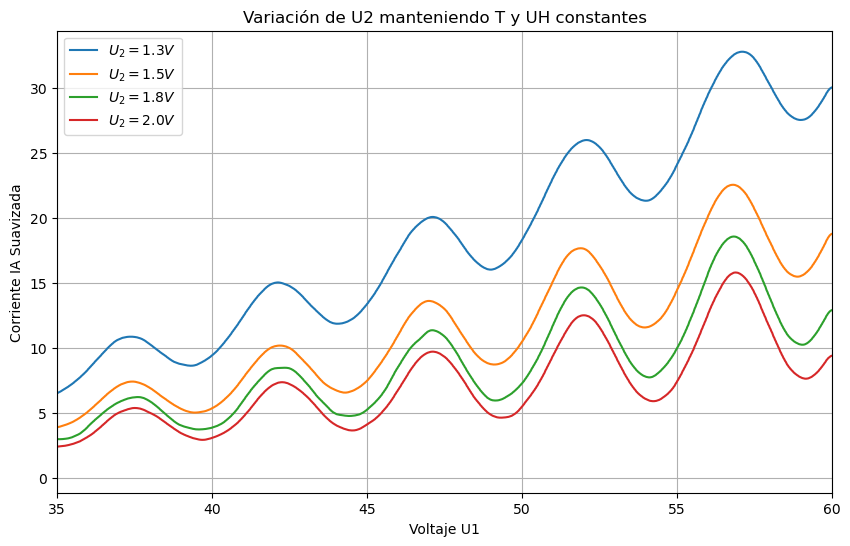

In [29]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_dfu13,voltajeu13, corrienteu13 = MinFH(DataU2_13['U1'],DataU2_13['IA'])
minimos_dfu15,voltajeu15, corrienteu15 = MinFH(DataU2_15['U1'],DataU2_15['IA'])
minimos_dfu18,voltajeu18, corrienteu18 = MinFH(DataU2_18['U1'],DataU2_18['IA'])
minimos_dfu2,voltajeu2, corrienteu2 = MinFH(DataU2_2['U1'],DataU2_2['IA'])
# minimos_dfu1,voltajeu1, corrienteu1 = MinFH(DataU2_1['U1'],DataU2_1['IA'])

#Graficas
plt.figure(figsize=(10, 6))
plt.plot(voltajeu13, corrienteu13, label=r"$U_2=1.3 V$")
plt.plot(voltajeu15, corrienteu15, label=r"$U_2=1.5 V$")
plt.plot(voltajeu18, corrienteu18, label=r"$U_2=1.8 V$")
plt.plot(voltajeu2, corrienteu2, label=r"$U_2=2.0 V$")

# plt.plot(minimos_dfu13['Voltaje U1'], minimos_dfu13['Corriente IA Suavizada'], 'ro', label='Mínimos de energía')

plt.title('Variación de U2 manteniendo T y UH constantes')
plt.xlabel('Voltaje U1')
plt.ylabel('Corriente IA Suavizada')
plt.xlim(35,60)
plt.legend()
plt.grid()
plt.show()

**T,U2 constantes y UH variable**

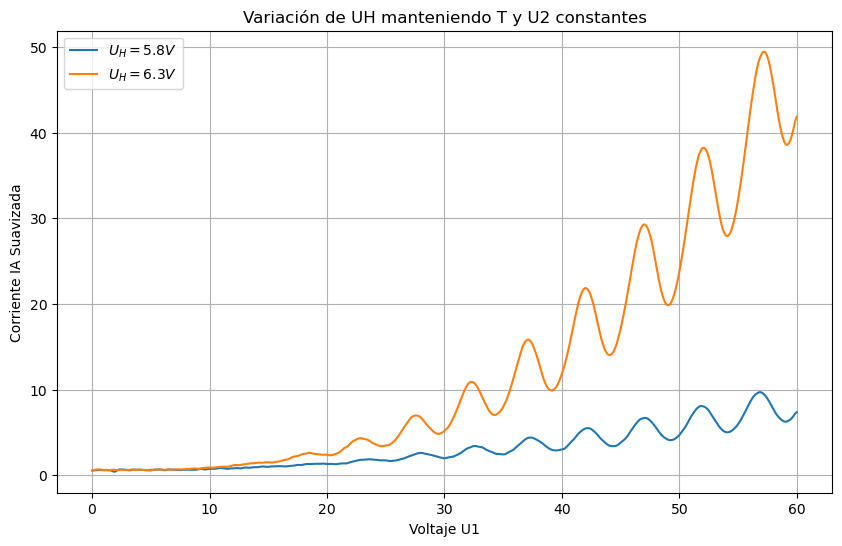

In [31]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_dfu58,voltajeu58, corrienteu58 = MinFH(DataUh_58['U1'],DataUh_58['IA'])
minimos_dfu63,voltajeu63, corrienteu63 = MinFH(DataUh_63['U1'],DataUh_63['IA'])

#Graficas
plt.figure(figsize=(10, 6))
plt.plot(voltajeu58, corrienteu58, label=r"$U_H=5.8 V$")
plt.plot(voltajeu63, corrienteu63, label=r"$U_H=6.3 V$")

# plt.plot(minimos_dfu13['Voltaje U1'], minimos_dfu13['Corriente IA Suavizada'], 'ro', label='Mínimos de energía')

plt.title('Variación de UH manteniendo T y U2 constantes')
plt.xlabel('Voltaje U1')
plt.ylabel('Corriente IA Suavizada')
# plt.xlim(35,60)
plt.legend()
plt.grid()
plt.show()